In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## Импорт и предобработка данных

In [2]:
# создам функцию импорта данных:

def import_data(link, name):
    sheet_id = link
    sheet_name = name
    url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
    name = pd.read_csv(url)
    return name

# импортирую 3 датафрейма:

visitors = import_data('1QEwlbKoT_jbHk9wtJm4LMbpXnb_bS7JJgtTEEEPV_GY', 'visitors')
orders = import_data('1NZOSs7ToT9m5kdEQYX09VqYN6I_BCeJHuyMeAdk3qzM', 'orders')
hypothesis = import_data('1HJsg7os3ro6UqA4d5pSUmjpJsfI7FbkkFAa2IO7lHXk', 'hypothesis')

Исследую каждый датафрейм подробнее. Начну с **'hypothesis'**:

In [3]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Датафрейм 'hypothesis' включает в себя 9 строк, содержащие уникальные гипотезы, которые предстоит проверить, и 5 колонок:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Названия колонок содержат в себе заглавные буквы. Приведу их к нижнему регистру:

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()

Далее изучу датафрейм **'orders'**:

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Датафрейм 'orders' включает в себя 1197 строк и 5 колонок:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Колонка 'date' принадлежит к типу 'object', хотя содержит информацию о датах. Приведу этот столбец к типу 'datetime':

In [9]:
orders['date'] = pd.to_datetime(orders['date'])

Последний исследуемый датафрейм **'visitors'**:

In [10]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Датафрейм 'visitors' включает в себя 62 строки и 3 колонки:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Колонка 'date' также принадлежит к типу 'object', повторю приведение к типу 'datetime':

In [12]:
visitors['date'] = pd.to_datetime(visitors['date'])

Дополнительно проверю исходные данные на наличие дубликатов:

In [13]:
print('Обнаружено дубликатов в датафрейме "hypothesis":', hypothesis.duplicated().sum())

Обнаружено дубликатов в датафрейме "hypothesis": 0


In [14]:
print('Обнаружено дубликатов в датафрейме "orders":', orders.duplicated().sum())

Обнаружено дубликатов в датафрейме "orders": 0


In [15]:
print('Обнаружено дубликатов в датафрейме "visitors":', orders.duplicated().sum())

Обнаружено дубликатов в датафрейме "visitors": 0


Так как могут быть такие пользователи, которые попали в обе группы, обработаю исходные данные путем исключения Id, которые вошли и в группу А, и в группу В:

In [16]:
# сгруппирую данные по идентификатору пользователя и группе, в которую он вошел
not_duplicates = orders.groupby(['visitorId', 'group'])['revenue'].sum().reset_index()

# с помощью метода drop_duplicates удалю все повторяющиеся идентификаторы пользователей
not_duplicates = not_duplicates.drop_duplicates(subset='visitorId', keep=False)

not_duplicates.head()

,visitorId,group,revenue
0,5114589,B,570
1,6958315,B,1490
4,11685486,A,6201
5,39475350,B,3990
6,47206413,B,730


In [17]:
# для дальнейшей работы создам Series 'visitors', в который войдут "очищенные" id пользователей
not_duplicates_s = pd.Series(not_duplicates['visitorId'])

not_duplicates_s.head()

0     5114589
1     6958315
4    11685486
5    39475350
6    47206413
Name: visitorId, dtype: int64

In [18]:
# теперь в датафрейме 'orders' id пользователей принадлежат только к одной группе
orders = orders.query('visitorId in @not_duplicates_s')

**Вывод:**

В данном разделе были исследованы датафреймы 'hypothesis', 'orders' и 'visitors', содержащие в себе информацию о проверяемых гопотезах, заказах и пользователях интернет-магазина. 

Колонки 'date', содержащие данные о датах, были приведены к типу datetime.

Дубликаты и пропущенные данные не были обнаружены.


Исходные данные содержали пользователей, попавших в обе группы. В процессе преодобработки информация о таких пользователях была удалена.

## Исследовательский анализ данных

### Приоритизация гипотез

Для увеличения выручки отделом маркетинга было составлено 9 гипотез, но так как проверка всех потребует больших ресурсов, необходимо выбрать какие гипотезы стоит тестировать, а какие нет. Для этого их следует приоритизировать.

Начну с одного из самых популярных способов приоритизации - ICE.  
Аббревиатура включает 3 фактора, которые можно использовать для оценки и приоритизации гипотез:
- Impact — влияние;
- Confidence — уверенность в оценке охвата, влияния и трудозатрат;
- Effort — трудозатраты.

Для его расчета необходимо перемножить такие показатели как 'impact', 'confidence' и разделить произведение на 'efforts'. Эти данные содержатся в датафрейме 'hypothesis'

In [19]:
# ICE SCORE = (Impact + Confidence)/Efforts

hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

display(hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


У метода ICE есть модификация RICE, отличающаяся тем, что к в произведение к 'impact' и 'confidence' добавляется еще показатель 'reach' - охват

In [20]:
#RICE = (Reach * Impact * Confidence) / Effort

hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']

display(hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending=False))

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


**Вывод:**

Если сравнить 3 лидирующие гипотезы по методам ICE и RICE, можно увидеть, что 2 из 3 совпадают в обоих способах. Это 'Добавление двух новых каналов для привлечения трафика, что позволит привлекать на 30% больше пользователей' и 'Добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'. 

Однако в методе RICE место гипотезы 'Запустить акцию, дающую скидку на товар в день рождения' заняла гипотеза 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'. Можно сделать вывод, что способ RICE позволил избежать предвзятого отношения к функции, дающей скидки в день рождения, которую хотелось бы использовать самому, т.к. вышеуказанный способ содержит компонет 'reach', позволяющий оценить ка повлияет проект на множество людей в течение определенного периода.

### Анализ A/B-теста

#### График кумулятивной выручки по группам

Для начала создам датафрейм 'datesGroups', в котором будут содержаться уникальные пары значений дат и групп теста

In [21]:
datesGroups = orders[['date','group']].drop_duplicates()

Создам агрегированные кумулятивные по дням данные о заказах с помощью функции np.logical_and(), которая позволяет применить булевы операции к объектам Series. Также вычислю максимум по дате и группе A/B-теста, в которую попал заказ. Также найду число уникальных id заказов и пользователей и посчитаю сумму средних чеков. В завершение отсортирую результат по столбцам 'date' и 'group'.

Таким образом получу строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups:

In [22]:
orders_agg = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                               orders['group'] == x['group'])].agg({'date' : 'max', 
                                                                                                    'group' : 'max', 
                                                                                                    'transactionId' : pd.Series.nunique, 
                                                                                                    'visitorId' : pd.Series.nunique, 
                                                                                                    'revenue' : 'sum'}), axis=1).sort_values(by=['date',
                                                                                                                                                 'group'])
orders_agg.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Аналогично получу агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [23]:
visitors_agg = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                   visitors['group'] == x['group'])].agg({'date' : 'max', 
                                                                                                          'group' : 'max', 
                                                                                                          'visitors' : 'sum'}), axis=1).sort_values(by=['date',
                                                                                                                                                      'group'])
visitors_agg.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединю кумулятивные данные в новом датафрейме 'cumulative' и присвою ее столбцам новые названия:

In [24]:
cumulative = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Создам датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и в группе В:

In [25]:
cumulative_A = cumulative[cumulative['group']=='A'][['date','revenue', 'orders']]

cumulative_B = cumulative[cumulative['group']=='B'][['date','revenue', 'orders']]

Построю график выручки группы А и группы В:

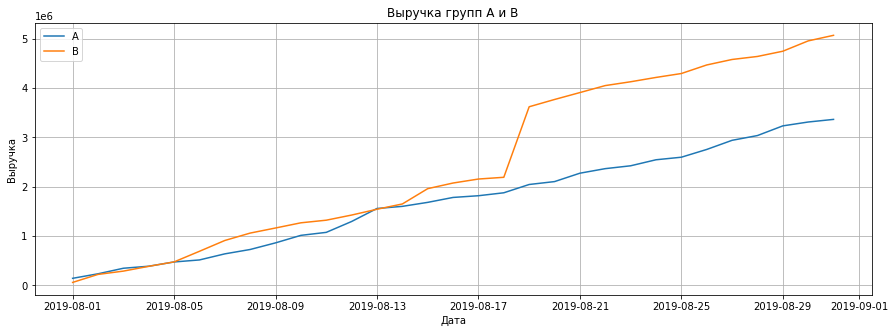

In [26]:
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(cumulative_A['date'], 
         cumulative_A['revenue'], 
         label='A')

plt.plot(cumulative_B['date'], 
         cumulative_B['revenue'], 
         label='B')

plt.legend()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Выручка групп А и В');

**Вывод:**

Можно увидеть, что по 8 августа 2019 года выручка растет практически равномерно. Однако, между 17 и 21 августа кумулятивная выручка группы В резко возрастает. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

#### График кумулятивного среднего чека по группам

Построю графики среднего чека по группам путем деления кумулятивной выручки на кумулятивное число заказов:

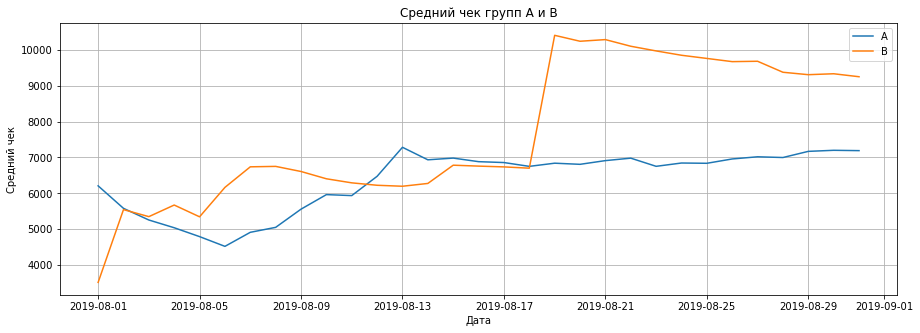

In [27]:
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(cumulative_A['date'], cumulative_A['revenue']/cumulative_A['orders'], label='A')
plt.plot(cumulative_B['date'], cumulative_B['revenue']/cumulative_B['orders'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Средний чек групп А и В');

**Вывод:**

Средний чек имеет несколько точек соприкосновения: 2го августа средний чек группы А резко пошел в рост, в то время как средний чек по группе В наоборот снижался. 11-12го  августа средний чек по группе В возрос и 'догнал' средний чек по группе А, был на пике 13го августа, а 15го августа снова совпал по значению и уже держался на уровне ~7000 до конца анализируемого периода.
Средний чек по группе В на всем временном отрезке возрастал скачкообразно, достигнув максимума 19 августа на отметке свыше 10000. Возможно это объясняется наличием крупных заказов.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

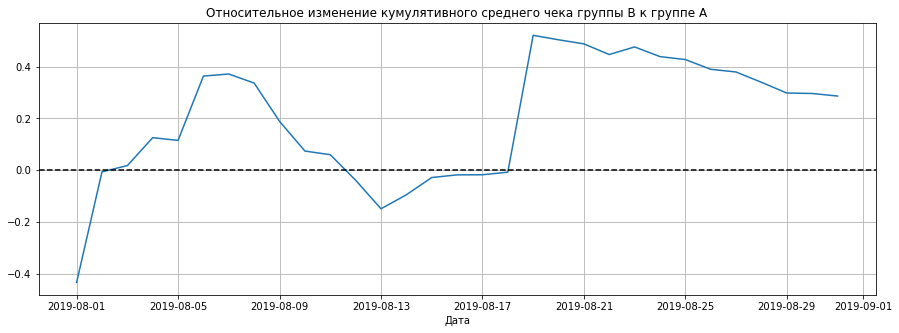

In [28]:
# объединю данные в новом датафрейме
cumulative_merge = cumulative_A.merge(cumulative_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# построю отношение средних чеков
plt.figure(figsize=(15,5))
plt.grid(True)
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.plot(cumulative_merge['date'], (cumulative_merge['revenueB']/cumulative_merge['ordersB'])/(cumulative_merge['revenueA']/cumulative_merge['ordersA'])-1)

# добавлю ось X методом axhline()
plt.axhline(y=0, color='black', linestyle='--');

**Вывод:**

На графике можно увидеть скачкообразное изменение среднего чека: пик 6-8 августа, резкое падение 13 августа и максимальное значение за анализируемый период, приходящееся на 19 августа. Необходимо в дальнейшем исследовать данные на выбросы.

Использую данные о минимальном и максимальном значении оси у для построения графика комулятивной прогрессии

#### График кумулятивной конверсии по группам

Рассчитаю кумулятивную конверсию:

In [29]:
cumulative['conversion'] = cumulative['orders']/cumulative['visitors']

Отделю данные по группам:

In [30]:
cumulativeDataA = cumulative[cumulative['group']=='A']

cumulativeDataB = cumulative[cumulative['group']=='B']

Построю графики. Для этого задам масштаб осей методом plt.axis(). Передам ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y:

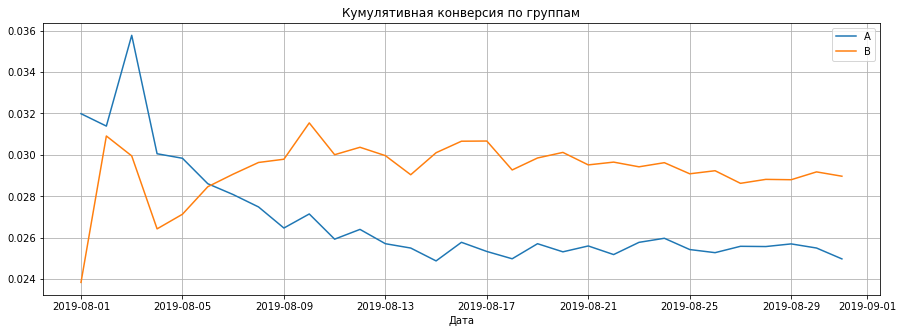

In [31]:
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.title('Кумулятивная конверсия по группам');

**Вывод:**

В интервале между 1 и 3 августа у обеих групп наблюдался резкий рост конверсии. Однако, после спада 4 августа, линия конверсии группы В резко пошла вверх, в то время как линия конверсии группы А практически симметрично пошла на спад. Проанализирую данные глубже с помощью графика относительного различия конверсий

#### График относительного изменения кумулятивной конверсии группы B к группе A

Объединю датафреймы 'cumulativeDataA'и 'cumulativeDataB' так, чтобы итоговый датафрейм 'cumulative_conversions' содержал информацию о дате и конверсии обеих групп

In [32]:
cumulative_conversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                      left_on='date', 
                                                                      right_on='date', 
                                                                      how='left', 
                                                                      suffixes=['A', 'B'])

Построю график относительного различия кумулятивной конверсии группы B к группе A

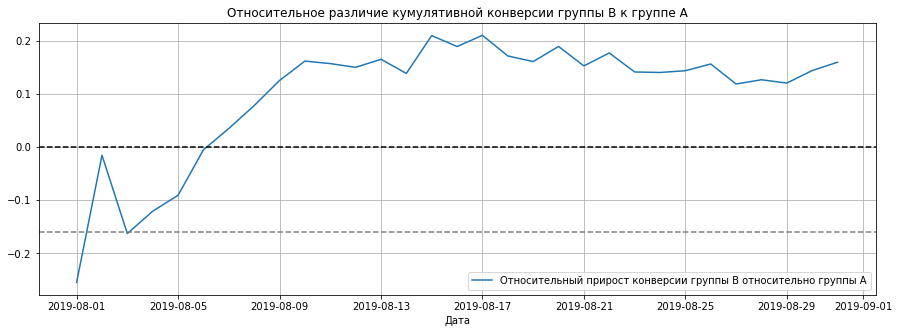

In [33]:
plt.figure(figsize=(15,5))
plt.grid(True)
plt.plot(cumulative_conversions['date'], cumulative_conversions['conversionB']/cumulative_conversions['conversionA']-1)
plt.legend(['Относительный прирост конверсии группы B относительно группы A'])
plt.xlabel('Дата')
plt.title('Относительное различие кумулятивной конверсии группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.16, color='grey', linestyle='--');

**Вывод:**

При анализе данного графика можно сделать вывод о значительном превосходстве конверсии группы В по отношению к конверсии группы А несмотря на отрицательные значения в начале теста

#### Точечный график количества заказов по пользователям

В связи с тем, что пользователи, совершившие много заказов, влияют на числитель формулы конверсии, необходимо рассчитать количество заказов по пользователям.

Для этого создам датафрейм 'ordersByUsers', в котором будут содержаться уникальные сочетания значений групп теста, выручки по заказам и дат, сгруппированные по идентификатору заказа и с количеством уникальных id заказов. Отсортирую по уменьшению количества заказов

In [34]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head()

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


Далее построю точечную диаграмму числа заказов на одного пользователя. В Series 'x_values' будут содержаться значения для оси х - количество уникальных пользователей, совершивших заказ 

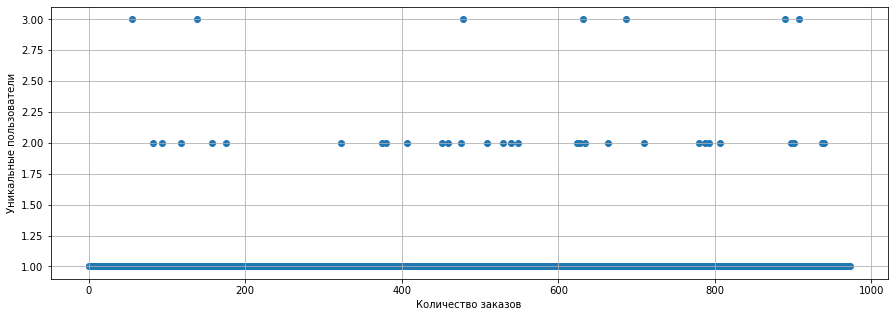

In [35]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid(True)
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Уникальные пользователи')
plt.xlabel('Количество заказов');

**Вывод:**

Данные датафрейма 'ordersByUsers' показали, что среди посетителей интернет-магазина есть такие, которые делают и по 3 заказа, что весьма много для анализируемого периода.

На точечном графике видно: есть много пользователей, сделавших 2 и более заказа. Однако на графике невозможно определить долю таких пользователей. 

Посчитаю для этого выборочные перцентили количества заказов на одного пользователя.

#### Расчет 95-го и 99-го перцентиля количества заказов на пользователя

Для подсчёта перцентилей применю метод percentile(). Определю 95-й и 99-й перцентили количества заказов на одного пользователя:

In [36]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Вывод:**

Только 1% - больше 2 заказов за анализируемый период.

Пользователей, совершивших более 2х закаов приму за 'аномальных'

#### Точечный график стоимостей заказов


Для очистки выборки от выбросов и аномально дорогих заказов проанализирую массив значений стоимостей заказов с помощью точечного графика

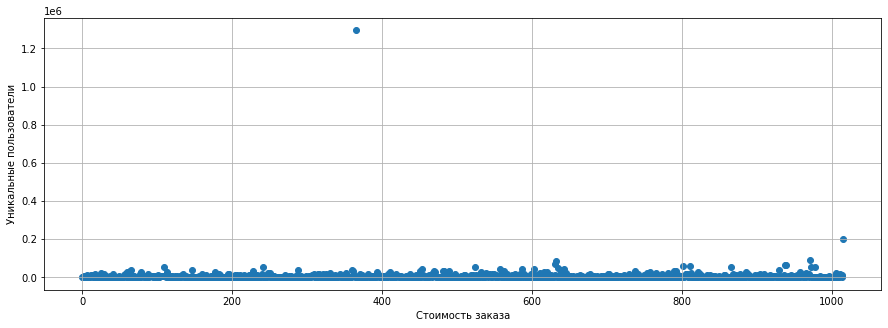

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15,5))
plt.grid(True)
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Уникальные пользователи')
plt.xlabel('Стоимость заказа');

**Вывод:**

На графике видно, что как минимум 2 заказа выбиваются из общего массива значений. 

Рассчитаю 95й и 99й перцентили, чтобы понять границу аномальных заказов

#### Расчет 95-го и 99-го перцентиля стоимости заказов

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод:**

Не более 5% заказов дороже 26785 рублей и не более 1% дороже 53904 рублей. Соответственоо, заказы дороже 30000 можно принять за аномальные

#### Расчет статистической значимости различий в конверсии между группами по «сырым» данным

Для начала посчитаю статистическую значимость различий в конверсии и среднем чеке между группами по 'сырым' данным, т.е. без удаления аномальных пользователей.

In [39]:
# в датафрейме 'visitorsADaily' сделаю срез по пользователям из группы А по данным и количеством пользователей в указанную дату
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# в датафрейме 'visitorsACummulative' будет количество пользователей в каждую дату в группе A
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# в датафрейме 'visitorsBDaily' сделаю срез по пользователям из группы В по данным и количеством пользователей в указанную дату
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# в датафрейме 'visitorsBCummulative' будет количество пользователей в каждую дату в группе В
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


# в 'ordersADaily' по дате сгруппирую данные о количестве заказов и суммарной выручке по группе А
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# в 'ordersACummulative' проаккумулирую вышеуказанные данные
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

# в 'ordersBDaily' по дате сгруппирую данные о количестве заказов и суммарной выручке по группе В
ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# в 'ordersACummulative' также проаккумулирую вышеуказанные данные, но уже по группе В
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
    {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

# объединю ранеесозданные датафреймы
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head())

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Создам переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажу число совершённых заказов.

In [40]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

Объявлю переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это необходимо для того, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Список индексов создам с помощью функции np.arange(). Она создаст массив индексов в формате np.array, который требуется в pd.Series.

Последовательности объединю функцией pd.concat() 

In [41]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
 

0        0
1        0
2        0
3        0
4        0
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18291, dtype: int64

Переменная sampleA должна состоять из двух частей: 
- Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders'].
- Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])

In [42]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 440    1
 441    1
 442    1
 443    1
 444    1
 Name: orders, Length: 445, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18286    0
 18287    0
 18288    0
 18289    0
 18290    0
 Name: orders, Length: 18291, dtype: int64]

Таким образом, в sampleA и sampleB будет содержаться выборка, в которой каждый элемент — число заказов определённого пользователя, в том числе ноль.

In [43]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Для начала сформулирую нулевую гипотезу: конверсия групп по «сырым» данным равна.

Далее применю критерий и отформатирую p-value, округлив его до 5 знаков после запятой.

Рассчитаю относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлю до трёх знаков после запятой.

In [44]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, 
                                          sampleB)[1], 
                       alternative='two-sided'))
print("{0:.2%}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.00551
15.98%


**Вывод:**

P-value чуть больше 0.05, поэтому сложно говорить об отвержении нулевой гипотезы. Предварительно можно сказать, что не существуют статистически значимых различий в конверсии между группами А и В.

При этом относительный прирост конверсии группы В к конверсии группы А = 16%

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Для данного подраздела также сформулирую и проверю нулевую гипотезу: средние чеки заказов по группам равны

In [45]:
# передам критерию mannwhitneyu() данные о выручке с заказов групп А и В
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1], 
                       alternative='two-sided'))

# найду относительные различия в среднем чеке между группами
print('{0:.2%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.415
28.66%


**Вывод:**

P-value = 0.415, что значительно больше 0.05. Вероятнее всего, существуют статистически значимые отличия в среднем чеке между группами. Это подтверждается относительным различием среднего чека между группами А и В в 29%.

В последующих подразделах проанализирую аномалии.

#### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

Найденные в предыдущих подразделах 95й и 99й перцентили количества заказов на одного пользователя равны 2 и 4 заказам на пользователя, соответственно. В то же время 95й и 99й перцентили средних чеков равны 28000 и 58233.2 рублям. 

Так, ранее было принято решение принять за 'аномальных' пользователей тех, кто сделал более 3х заказов и на сумму свыше 30000.

In [46]:
# сделаю срез пользователей с числом заказов больше 3
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId']], axis=0)

# а также срез пользователей, совершивших заказы на сумму более 30 000
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

# объединю срезы в 'abnormalUsers'
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

In [47]:
abnormalUsers.head()

1099    148427295
928     204675465
684     358944393
648     382846391
751     689129267
Name: visitorId, dtype: int64

In [48]:
# узнаю сколько всего аномальных пользователей
abnormalUsers.shape

(42,)

Таким образом, выявлено 42 аномальных пользователя.

Посмотрю как их действия повлияли на результаты теста путем расчета статистической значимости различий в конверсии между группами теста по очищенным данным. 

Для этого подготовлю выборки количества заказов по пользователям по группам теста:

In [49]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

Далее применю статистический критерий Манна-Уитни к полученным выборкам.
Нулевая теория будет гласить: нет различий в конверсии между группами по «очищенным» данным 

In [50]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, 
                                          sampleBFiltered)[1], 
                       alternative='two-sided'))

print('{0:.2%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
16.10%


**Вывод:**

P-value = 0.007, что, вероятнее всего, подтверждает гипотезу о равенстве конверсии между группами. Относительный прирост конверсии группы В к конверсии группы А по прежнему составляет 16%

####  Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Проверю гипотезу о значимости различий в среднем чеке заказа по "очищенным" данным. Приму за нулевую гипотезу утверждение, что средние чеки между группами равны

In [51]:
# передам критерию mannwhitneyu() очищенные данные о выручке с заказов групп А и В
print('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', 
                                                                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
                                          ['revenue'], 
                                          orders[np.logical_and(orders['group'] == 'B',
                                                                np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
                                          ['revenue'])[1], 
                       alternative='two-sided'))




# найду относительные различия в среднем чеке между группами
print("{0:.2%}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
                       ['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',
                                                                  np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
                       ['revenue'].mean()- 1))

0.421
-3.07%


**Вывод:**

Пожалуй, можно сделать вывод, что нулевая гипотеза снова не подтвердилась P-value снизился, однако разница между сегментами изменилась в сторону незначительного преимущества, всего в 3%, среднего чека группы А над средним чеком группы В. 

Можно сделать вывод, что аномалии не сильно могут влиять на результаты A/B-теста.

#### Решение по результатам теста

**Выводы:**
- График кумулятивной выручки по группам показывает, что результаты группы А хуже группы В;
- Графики кумулятивного среднего чека также показывают большое преимущество группы В;
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A:  относительный прирост конверсии группы В, относительно группы А составляет от 10 до 20% в разные даты;
- Статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий не наблюдается;
- Наблюдаются статистически значимые отличия в среднем чеке между группами. При этом относительное различие среднего чека между группами А и В составляет 26% по сырым данным. Однако после очистки данных от аномалий статистически значимое различие почти исчезло.

В данном случае нужно остановить тест, зафиксировать победу группы В и перейти к проверке следующей гипотезы.